In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
file_path = r'data1.csv'
df = pd.read_csv(file_path)


C:\Users\sebas\AppData\Local\Temp\ipykernel_10152\3132908926.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df.head(2)


,Year,Lithium Price($/m3ton),Nickel Price($/m3ton),Cobalt Price($/m3ton),Manganese($/m3ton),Steel ($/m3ton)
0,2010,5180.0,18434.0,39900.0,NAN,542.75
1,2011,5180.0,27324.0,38550.0,NAN,722.59


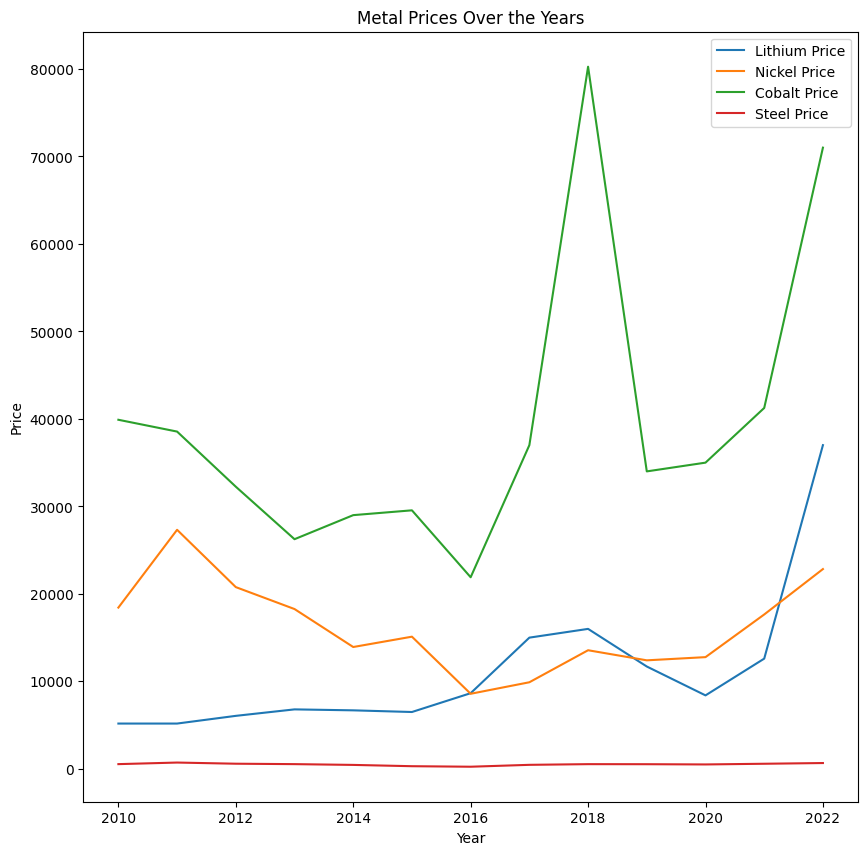

In [3]:
plt.figure(figsize=(10, 10))
plt.plot(df['Year'], df['Lithium Price($/m3ton)'], label='Lithium Price')
plt.plot(df['Year'], df['Nickel Price($/m3ton)'], label='Nickel Price')
plt.plot(df['Year'], df['Cobalt Price($/m3ton)'], label='Cobalt Price')
#plt.plot(df['Year'], df['Manganese($/m3ton)'], label='Manganese Price')
plt.plot(df['Year'], df['Steel ($/m3ton)'], label='Steel Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Metal Prices Over the Years')
plt.legend()
plt.show()

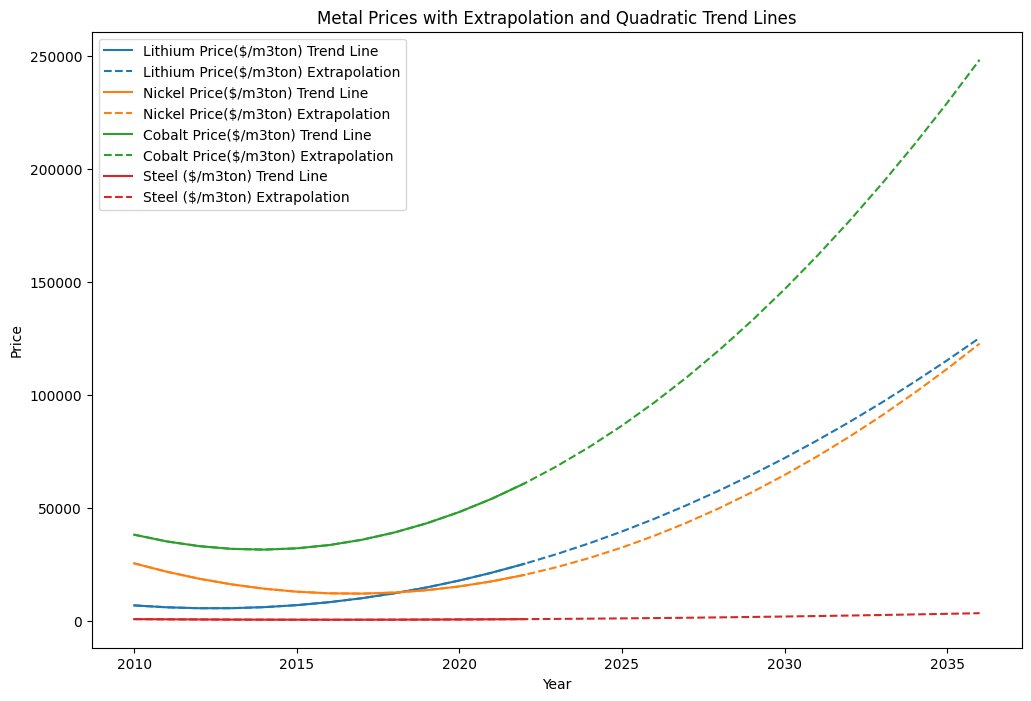

In [4]:
columns_to_analyze = ['Lithium Price($/m3ton)', 'Nickel Price($/m3ton)', 'Cobalt Price($/m3ton)',
                       'Steel ($/m3ton)']

# Plot the original data
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_analyze):
    # second-degree polynomial 
    coefficients = np.polyfit(df['Year'], df[column], 2)
    observed_years = df['Year']
    extrapolated_years = np.arange(df['Year'].min(), df['Year'].max() + 15, 1) 
    observed_trend_line = np.polyval(coefficients, observed_years)
    extrapolated_trend_line = np.polyval(coefficients, extrapolated_years)

    # Plot the original data, trend line, and extrapolation with different colors
    
    plt.plot(observed_years, observed_trend_line, label=f'{column} Trend Line', color=f'C{i}', linestyle='-')
    plt.plot(extrapolated_years, extrapolated_trend_line, '--', label=f'{column} Extrapolation', color=f'C{i}')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Metal Prices with Extrapolation and Quadratic Trend Lines')
plt.legend()
plt.show()

In [5]:
file_path = r'cars.csv'
df2 = pd.read_csv(file_path)
df2=df2.iloc[:,:12]

In [6]:
df2.tail(2)

,Year,China,US,Germany,France,UK,Norway,Netherlands,Sweden,Japan,Canada,Global
11,2021,7842668,2322291,1380000,786274,745000,647000,390454,355737,337377,297960,16200000
12,2022,14100000,2960000,1877721,990000,950000,817471,515838,440000,410000,380000,25900000


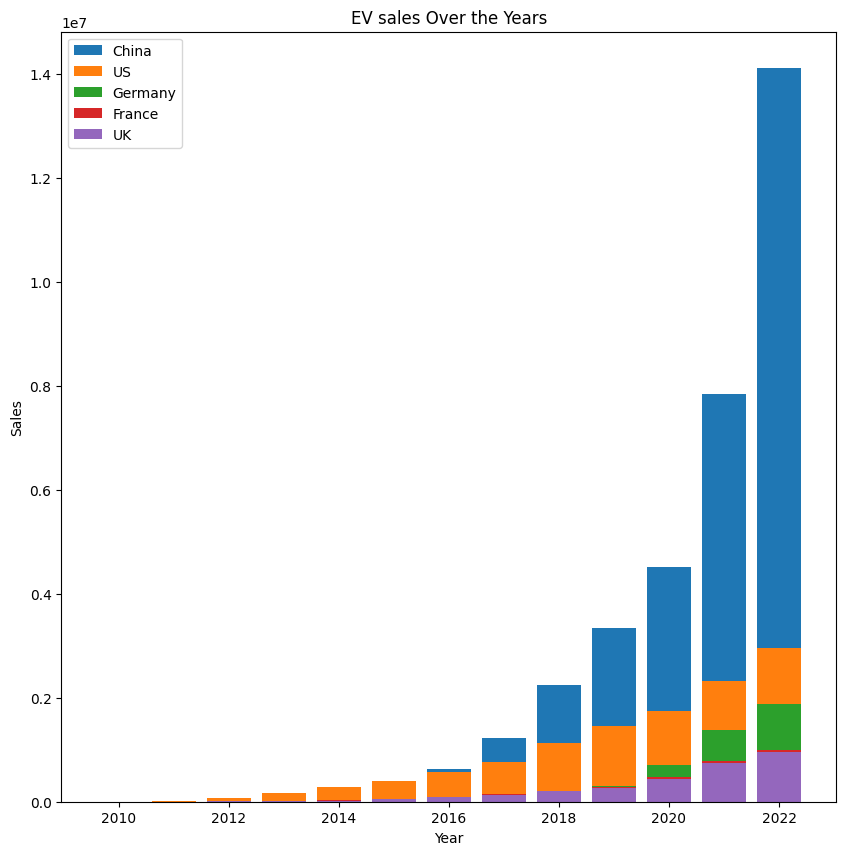

In [7]:
plt.figure(figsize=(10, 10))
plt.bar(df2['Year'], df2['China'], label='China')
plt.bar(df2['Year'], df2['US'], label='US')
plt.bar(df2['Year'], df2['Germany'], label='Germany')
plt.bar(df2['Year'], df2['France'], label='France')
plt.bar(df2['Year'], df2['UK'], label='UK')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('EV sales Over the Years')
plt.legend()
plt.show()

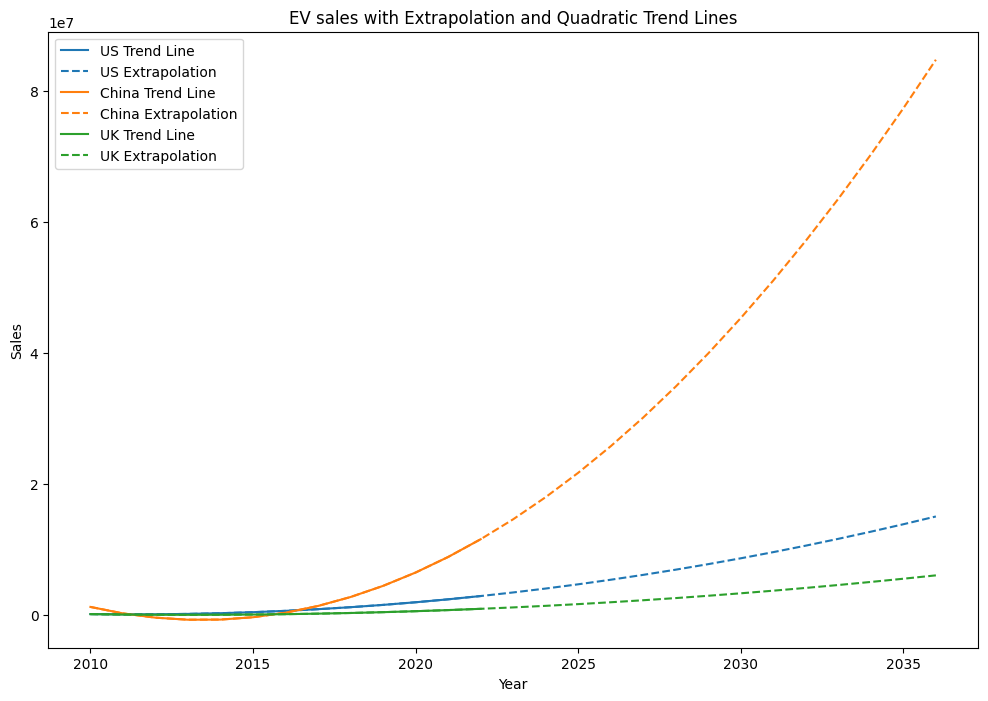

In [8]:
columns_to_analyze_2 = ['US', 'China','UK']

# Plot the original data
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_analyze_2):
    # Fit a second-degree polynomial trend line
    coefficients = np.polyfit(df2['Year'], df2[column], 2)
    observed_years = df2['Year']
    extrapolated_years = np.arange(df2['Year'].min(), df2['Year'].max() + 15, 1) 
    observed_trend_line = np.polyval(coefficients, observed_years)
    extrapolated_trend_line = np.polyval(coefficients, extrapolated_years)

    # Plot the original data, trend line, and extrapolation with different colors
    #plt.scatter(df['Year'], df[column], label=f'{column} Original', marker='o', alpha=0.7)
    plt.plot(observed_years, observed_trend_line, label=f'{column} Trend Line', color=f'C{i}', linestyle='-')
    plt.plot(extrapolated_years, extrapolated_trend_line, '--', label=f'{column} Extrapolation', color=f'C{i}')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('EV sales with Extrapolation and Quadratic Trend Lines')
plt.legend()
plt.show()

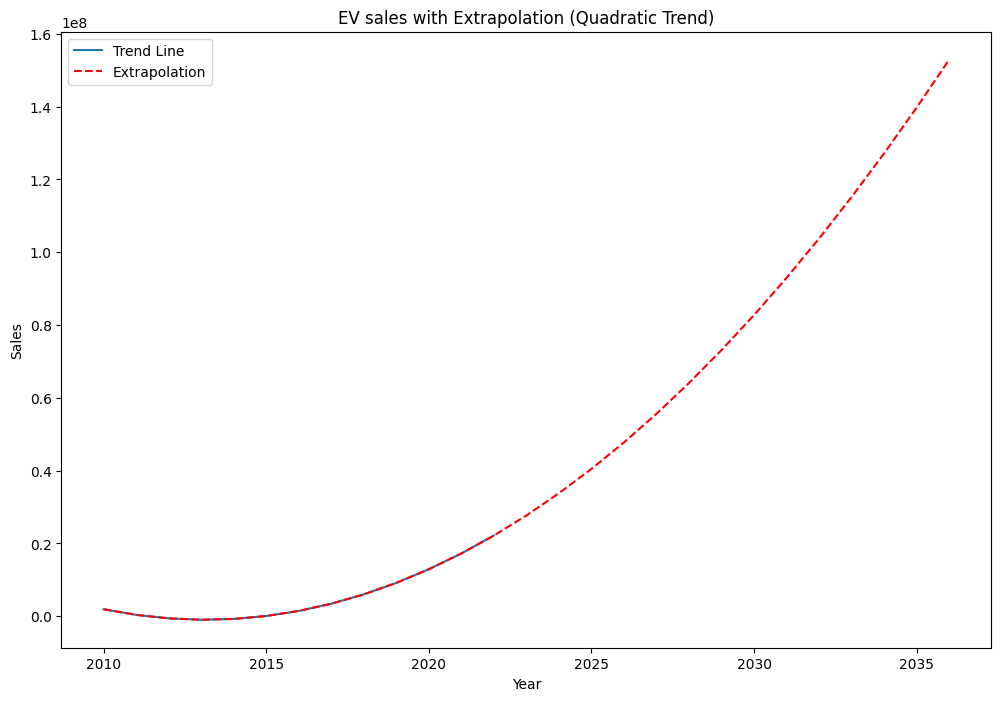

In [9]:
column_to_analyze3 ='Global'

# Fit a second-degree polynomial trend line
coefficients = np.polyfit(df2['Year'], df2[column_to_analyze3], 2)

# Define the observed and extrapolated years
observed_years = df2['Year']
extrapolated_years = np.arange(df2['Year'].min(), df2['Year'].max() + 15, 1)  # Assuming a 10-year extrapolation

# Use the quadratic equation to predict Nickel Prices for both observed and extrapolated years
observed_trend_line = np.polyval(coefficients, observed_years)
extrapolated_trend_line = np.polyval(coefficients, extrapolated_years)

# Plot the original data, trend line, and extrapolation
plt.figure(figsize=(12, 8))
#plt.scatter(df2['Year'], df2[column_to_analyze3], label=f'{column_to_analyze3} Original')
plt.plot(observed_years, observed_trend_line, label='Trend Line')
plt.plot(extrapolated_years, extrapolated_trend_line, '--', label='Extrapolation', color='red')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('EV sales with Extrapolation (Quadratic Trend)')
plt.legend()
plt.show()

In [10]:
merged_df3 = pd.merge(df, df2, on='Year')

In [11]:
merged_df3=merged_df3[['Year','Lithium Price($/m3ton)', 'Nickel Price($/m3ton)', 'Cobalt Price($/m3ton)','Global']]

In [12]:
merged_df3.head(2)

,Year,Lithium Price($/m3ton),Nickel Price($/m3ton),Cobalt Price($/m3ton),Global
0,2010,5180.0,18434.0,39900.0,17368
1,2011,5180.0,27324.0,38550.0,64794


In [13]:
df4= merged_df3.rename(columns={'Global':'Global EV sales'})
df4.head(2)

,Year,Lithium Price($/m3ton),Nickel Price($/m3ton),Cobalt Price($/m3ton),Global EV sales
0,2010,5180.0,18434.0,39900.0,17368
1,2011,5180.0,27324.0,38550.0,64794


In [14]:
corr_matrix1 = df4['Global EV sales'].corr(df4['Lithium Price($/m3ton)'])
corr_matrix2 = df4['Global EV sales'].corr(df4['Nickel Price($/m3ton)'])
corr_matrix3 = df4['Global EV sales'].corr(df4['Cobalt Price($/m3ton)'])
corr_matrix4 = df4['Global EV sales'].corr(df4['Global EV sales']) #Control


In [15]:
print(corr_matrix1)
print(corr_matrix2)
print(corr_matrix3)
print(corr_matrix4)

0.8541326843415564
0.15908350065766802
0.5568717310030958
0.9999999999999999


In [16]:
file_path3=r'lithium_prod.csv'
df5 = pd.read_csv(file_path3)

In [17]:
df5.head(2)

,Year,Lithium production (m3ton)
0,2010,28100
1,2011,34100


In [18]:
merge_lithium_df6 = pd.merge(df4,df5, on='Year')

In [19]:
merge_lithium_df6 = merge_lithium_df6[['Year','Lithium Price($/m3ton)','Global EV sales','Lithium production (m3ton)']]

In [20]:
merge_lithium_df6.head(2)

,Year,Lithium Price($/m3ton),Global EV sales,Lithium production (m3ton)
0,2010,5180.0,17368,28100
1,2011,5180.0,64794,34100


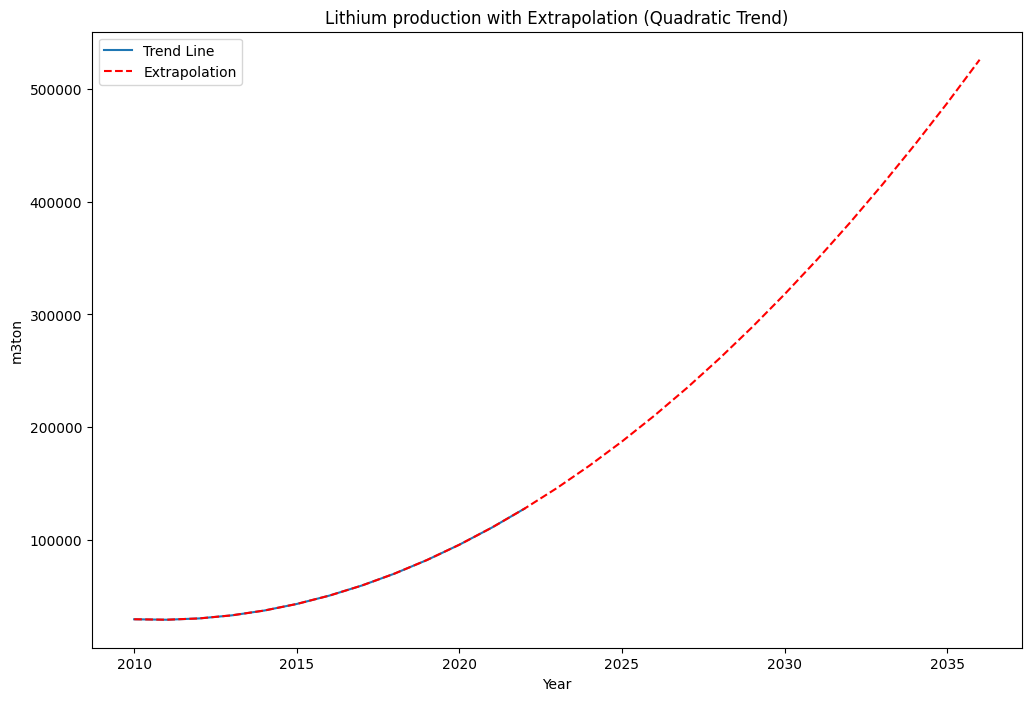

In [21]:
column_to_analyze4 ='Lithium production (m3ton)'

# Fit a second-degree polynomial trend line
coefficients = np.polyfit(merge_lithium_df6['Year'], merge_lithium_df6[column_to_analyze4], 2)

# Define the observed and extrapolated years
observed_years = merge_lithium_df6['Year']
extrapolated_years = np.arange(merge_lithium_df6['Year'].min(), merge_lithium_df6['Year'].max() + 15, 1)  # Assuming a 10-year extrapolation

# Use the quadratic equation to predict Nickel Prices for both observed and extrapolated years
observed_trend_line = np.polyval(coefficients, observed_years)
extrapolated_trend_line = np.polyval(coefficients, extrapolated_years)

# Plot the original data, trend line, and extrapolation
plt.figure(figsize=(12, 8))
plt.plot(observed_years, observed_trend_line, label='Trend Line')
plt.plot(extrapolated_years, extrapolated_trend_line, '--', label='Extrapolation', color='red')

plt.xlabel('Year')
plt.ylabel('m3ton')
plt.title('Lithium production with Extrapolation (Quadratic Trend)')
plt.legend()
plt.show()

In [22]:
#Global Lithium reserves = 88 Millions of Tons (source from 2021)

In [23]:
from scipy.optimize import fsolve
column_to_analyze4 = 'Lithium production (m3ton)'
desired_lithium_volume = 88000000  
coefficients = np.polyfit(merge_lithium_df6['Year'], merge_lithium_df6[column_to_analyze4], 2)
quadratic_equation = np.poly1d(coefficients)
# Define a function to find the year when lithium production reaches the desired volume
def find_year(desired_volume):
    return fsolve(lambda x: quadratic_equation(x) - desired_volume, x0=merge_lithium_df6['Year'].mean())
# Use the function to find the year
year_when_desired_volume = find_year(desired_lithium_volume)
print(f"The year when {desired_lithium_volume} m3ton of lithium will be produced in: {year_when_desired_volume[0]}")

The year when 88000000 m3ton of lithium will be produced in: 2346.781202654747


In [24]:
#to be continued